# **DATA ANALYSIS AND VISUALIZATION**

## I. IMPORT THƯ VIỆN

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as ps


## II. THU THẬP DỮ LIỆU

In [2]:
data = pd.read_csv('./data/processed_data.csv')
data.head()

transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type  year  month  date     day  hour     time  \
0  Gourmet brewed coffee  2023      1     1  Sunday     7  morning   
1        Brewed Chai tea  2023      1     1  Sunday     7  morning   
2          Hot chocolate  2023      1     1  Sunday     7  morning   
3            Drip coffee  2023      1     1  Sunday     7  morning   
4        Brewed Chai tea  2023      1     1  Sunday     7  morning   

   total_revenue  
0            6.0  
1            6.2  
2            9.0  
3            2.0  
4            6.2

## III. PHÂN TÍCH VÀ TRỰC QUAN HÓA

### **1. Tổng quan về thời gian:**

#### *1.1 Doanh thu tổng cộng theo tháng-năm là bao nhiêu?*

In [3]:
# tìm doanh thu tổng cộng theo từng tháng tại mỗi cửa hàng
monthly_revenue = data.groupby(['store_location', 'month'])['total_revenue'].sum().reset_index()

fig = px.line(monthly_revenue, x = 'month', y='total_revenue', color='store_location')
fig.update_layout(
    title={'text': 'The total revenue of 3 stores in the first-half of 2023','x': 0.5, 'xanchor': 'center'},  # Căn giữa tiêu đề
    xaxis_title="Month in Year",  # Nhãn trục x
    yaxis_title="Total Revenue",  # Nhãn trục y
    height=600,  # Chỉnh chiều cao của biểu đồ
    width=1100,  # Chỉnh chiều rộng của biểu đồ
    xaxis=dict(
        tickmode='array',
        tickvals=[1, 2, 3, 4, 5, 6],  # Giá trị trục x (1 = Jan, 2 = Feb, ...)
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']  # Nhãn tương ứng
    )
)
fig.show()

**Nhận xét**
- Doanh thu theo tháng của ba cửa hàng không có sự chênh lệch quá lớn, đều có xu hướng giảm nhẹ từ tháng 1 sang tháng 2 sau đó tăng mạnh từ tháng hai đến tháng sáu. Mức độ tăng và giảm cũng tương đối giống nhau. Doanh thu của mỗi tháng trong sáu tháng đầu năm 2023 của mỗi cửa hàng nằm trong khoảng 25000 đến 55000
- Tuy nhiên, cửa hàng ở Hell's Kitchen đã tạo ra sự khác biệt khi trong suốt sáu tháng, cửa hàng này luôn đứng đầu về doanh thu, dùng khoảng cách tạo ra với hai cửa hàng còn lại không quá lớn.
- Về hai cửa hàng còn lại, cửa hàng ở Astoria có doanh thu cao hơn cửa hàng ở Lower Mahathan một chút. Vào khoảng từ tháng 2 đến tháng 4, doanh thu của hai cửa hàng này gần như tương đồng nhau. Tuy nhiên ở các tháng còn lại, dễ dàng trông thấy doanh thu của cửa hàng ở Astoria cao hơn Lower Mahathan

**Lý do chọn biểu đồ**
- Biểu đồ đường phù hợp cho dữ liệu liên quan đến đến chuỗi thời gian, giúp ta nhìn rõ xu hướng tăng - giảm của doanh thu trong nhiều tháng liên tiếp, đặc biệt là sự tăng đột biến hoặc giảm đột ngột.
- Hơn nữa, khi biểu thị cả ba đường đại diện cho ba cửa hàng thì biểu đồ được cũng giúp ta dễ so sánh số liệu của ba cửa hàng nhìn chung trong sáu tháng và nhìn riêng qua từng tháng

#### *1.2 Lượng giao dịch có xu hướng tăng hay giảm theo thời gian?*

In [4]:
# tính tổng giao dịch hàng tháng tại mỗi cửa hằng
monthly_transaction = data.groupby(['store_location', 'month'])['transaction_id'].count().reset_index()

fig = px.line(monthly_transaction, x = 'month', y='transaction_id', color='store_location')
fig.update_layout(
    title={'text': 'The number of transaction in each month by store location','x': 0.5, 'xanchor': 'center'},  # Căn giữa tiêu đề
    xaxis_title="Month in 2023",  # Nhãn trục x
    yaxis_title="Number of Transaction",  # Nhãn trục y
    height=600,  # Chỉnh chiều cao của biểu đồ
    width=1100,  # Chỉnh chiều rộng của biểu đồ
    xaxis=dict(
        tickmode='array',
        tickvals=[1, 2, 3, 4, 5, 6],  # Giá trị trục x (1 = Jan, 2 = Feb, ...)
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']  # Nhãn tương ứng
    )
)
fig.show()

**Nhận xét**
- Trong sáu tháng, số lượng giao dịch của mỗi cửa hàng tăng từ khoảng 6000 giao dịch (tháng 1) đến hơn 11000 giao dịch (tháng 6)
- Tuy nhiên, số lượng giao dịch không phải luôn tăng đều qua các tháng. Từ tháng 1 sang tháng 2, số giao dịch của cả ba cửa hàng đều giảm nhẹ, sau đó lại tăng mạnh từ tháng 2 đến tháng 5. Từ tháng 5 đến tháng 6, số lượng giao dịch vẫn tăng nhưng không tăng mạnh.
- Biểu đồ này cho thấy mối liên hệ giữa số lượng giao dịch và doanh thu của một cửa hàng. Số lượng giao dịch tăng hay giảm sẽ dẫn đến doanh thu tăng hoặc giảm.
- Trong biểu đồ này, số lượng giao dịch của hai cửa hàng Astoria và Hell's Kitchen không chênh lệch quá nhiều, còn số lượng giao dịch của Lower Manhattan thì cách hai cửa hàng kia khoảng 2000-4000 giao dịch cho mỗi tháng.

**Lý do chọn biểu đồ:** Cũng giống như biểu đồ thể hiện doanh thu phía trên, biểu đồ đường phù hợp cho dữ liệu liên quan đến đến chuỗi thời gian, giúp ta nhìn rõ xu hướng tăng - giảm của dữ liệu, đặc biệt là sự tăng đột biến hoặc giảm đột ngột.

#### *1.3 Liệu rằng cuối tuần sẽ có doanh thu cao hơn các ngày trong tuần?*

In [5]:
fig = px.box(data, x="day", y="total_revenue", color = 'store_location', notched=True, title="Revenue By Day of 3 Coffe Store")

fig.update_layout(
    title={'x': 0.5, 'xanchor': 'center'},  # Căn giữa tiêu đề
    xaxis_title="Day in Week",  # Nhãn trục x
    yaxis_title="Number of Transaction",  # Nhãn trục y
    height=600,  # Chỉnh chiều cao của biểu đồ
    width=1100,  # Chỉnh chiều rộng của biểu đồ
)
fig.show()

**Nhận xét**
- Doanh thu vào cuối tuần không tăng đáng kể so với doanh thu ngày thường trong tuần dựa vào các hộp trên Oy.
- Tuy nhiên, tại cửa hàng Hell's Kitchen có những giá trị ngoại lệ cao hơn hẳn vào cuối tuần, nhưng phân phối cụ thể không chênh lệch quá lớn.
- Hai cửa hàng còn lại giữ mức ổn định, doanh thu không có dao động quá lớn giữa các ngày.

**Lý do chọn biểu đồ**
- Biểu đồ này có thể hiện được giá trị trung vị, khoảng giá trị giữa cũng như các giá trị ngoại biên. Điều này giúp xác định xu hướng và tìm ra các bất thường trong dữ liệu.
- Trong trường hợp này, biểu đồ hộp còn giúp so sánh sự khác biệt giữa các nhóm (ở đây phân nhóm theo cửa hàng và ngày trong tuần), từ đó đưa ra câu trả lời cho câu hỏi ban đầu

### **2. Phân tích chi tiết**

#### *2.1 Cửa hàng nào tạo ra doanh thu cao nhất?*

In [6]:
# tổng doanh thu của mỗi của hàng
revenue_by_store = data.groupby('store_location')['total_revenue'].sum().reset_index()
# Vẽ biểu đồ tròn với plotly.express
fig = px.pie(
    revenue_by_store,
    values='total_revenue',
    names='store_location'
)
fig.update_traces(textinfo='percent+label')
fig.update_layout(
    title=dict(
        text='Stores\'s Revenue Contribution',
        x=0.5,  # Căn giữa tiêu đề (giá trị từ 0 đến 1)
        xanchor='center',  # Cố định vị trí
        font=dict(size=24)  # Tăng kích thước font
    ),
    width=600,  # Tăng chiều rộng biểu đồ
    height=600,  # Tăng chiều cao biểu đồ
)

fig.update_traces(textinfo='percent+label')
fig.show()

**Nhận xét:**
- Trong sáu tháng, cửa hàng đứng đầu về doanh thu là cửa hàng Hell's Kitchen. Điều này hoàn toàn phù hợp với biểu đồ đã trực quan ở mục 1.1, bởi biều đồ đường đã thể hiện doanh thu của Hell's Kitchen luôn đứng đầu qua các tháng, cho nên sẽ có tổng doanh thu cao nhất.
- Tuy hai cửa hàng còn lại có doanh thu thấp hơn nhưng không đáng kể. Xếp thứ hai là Astoria và xếp thứ ba là Love Manhattan. Nhưng nhìn chung, ba cửa hàng có doanh thu không chênh lệch quá lớn.

**Lý do chọn biểu đồ:**
- Biểu đồ tròn sẽ giúp ta dễ dàng so sánh tổng doanh thu giữa ba cửa hàng hơn. Nếu không bàn về yếu tố thời gian, việc sử dụng biểu đồ tròn sẽ giúp người dùng dễ hình dung về tổng doanh thu hơn là biểu đồ đường

#### *2.2 Sản phẩm nào bán chạy theo khung giờ trong ngày?*

In [7]:
# số lượng sản phẩm cụ thể được bán trong các khung giờ cụ thể
product_by_hour = data.groupby(['hour', 'product_type'])['transaction_qty'].sum()
product_by_hour = product_by_hour.unstack(0)
fig = px.imshow(product_by_hour.values, labels=dict(x="Hour in Day", y="Product Type", color='Transaction qty'),
              x=product_by_hour.columns, y=product_by_hour.index)
fig.update_xaxes(side="bottom")
fig.update_layout(
    title="Best-seller products by hour",
    title_x=0.5,  # Căn giữa tiêu đề
    title_font=dict(size=20),
    height=600,  # Chỉnh chiều cao của biểu đồ
    width=1100,  # Chỉnh chiều rộng của biểu đồ
    showlegend=False
)
fig.show()

**Nhận xét:**
- Một số sản phẩm như Gourmet brewed coffee có lượng giao dịch cao nhất vào buổi sáng từ 6 giờ đến 10 giờ, phản ánh nhu cầu uống cà phê vào buổi sáng.
- Vào buổi chiều tối, Drip coffee và Hot chocolate là những sản phẩm đạt được doanh số cao.
- Ngoài ra, Brewed tea, Gourmet brewed coffee và House blend beans là những sản phẩm bán chạy ở nhiều khung giờ.

**Lý do chọn biểu đồ:**
- Heatmap giúp ta trực quan hóa dữ liệu đa chiều, dễ dàng nhận ra mối liên kết giữa thời gian và sản phẩm dựa theo màu sắc.
- Biểu đồ giúp người dùng dễ dàng nhận biết loại sản phẩm bán chạy vào thời gian cụ thể, cũng như là dễ dạng nhìn thấy sản phẩm tiềm năng cũng như sản phẩm ít được quan tâm.

#### *2.3 Giá sản phẩm có ảnh hưởng đến số lượng bán ra không?*

In [8]:
# số lượng sản phẩm được bán theo giá tiền
product_sales = data.groupby(['product_type', 'unit_price'])['transaction_qty'].sum().reset_index()
fig = px.scatter(product_sales, x="unit_price", y="transaction_qty", color="product_type")
fig.update_layout(
    title=dict(
        text='The number of transaction of products.',
        x=0.5,  # Căn giữa tiêu đề (giá trị từ 0 đến 1)
        xanchor='center',  # Cố định vị trí
        font=dict(size=24)  # Tăng kích thước font
    ),
    width=1000,  # Tăng chiều rộng biểu đồ
    height=600,  # Tăng chiều cao biểu đồ
)
fig.show()


**Nhận xét:**
- Ta nhận thấy được, số lượng sản phẩm bán ra và giá sản phẩm tỉ lệ nghịch với nhau. Khi sản phẩm càng cao, số lượng bán ra càng thấp và ngược lại.
- Các sản phẩm nằm trong khoảng từ 0-5 đơn vị tiền tệ đều đạt doanh số cao (cao nhất là trên 8000 giao dịch).
- Hầu hết các sản phẩm có giá trên 5 đơn vị tiền tệ đều không đạt quá 2000 lượt giao dịch

**Lý do chọn biểu đồ:**
- Biểu đồ phân tán là lựa chọn thích hợp để hiển thị mối quan hệ giữa hai biến số liệu như số lượng giao dịch và giá cả sản phẩm. Nó cho phép ta quan sát rõ ràng sự phân bố của các điểm dữ liệu.
- Loại dữ liệu này có nhiều loại sản phẩm khác nhau, với mỗi loại sản phẩm có thể có nhiều điểm dữ liệu tương ứng với các mức giá bán khác nhau. Biểu đồ phân tán giúp ta dễ dàng phân biệt và so sánh các loại sản phẩm cũng như các mức giá bán.
- Sử dụng biểu đồ phân tán cho phép ta nhận ra các mẫu, xu hướng và outliers (giá trị nằm ngoài xu hướng chung) trong dữ liệu, ví dụ như các sản phẩm có số lượng giao dịch cao hoặc thấp so với mức giá.

#### *2.4 Khung giờ nào trong ngày sẽ có lượng giao dịch cao nhất?*

In [9]:
# Tính số lượng giao dịch theo giờ
transaction_by_hour = data['hour'].value_counts().reset_index()
transaction_by_hour.columns = ['hour', 'count']
max_hour = transaction_by_hour.loc[transaction_by_hour['count'].idxmax(), 'hour']  # Giờ có giá trị lớn nhất
min_hour = transaction_by_hour.loc[transaction_by_hour['count'].idxmin(), 'hour']  # Giờ có giá trị nhỏ nhất

# Thêm cột màu dựa trên điều kiện
data['color'] = data['hour'].apply(
    lambda x: 'red' if x == max_hour else ('blue' if x == min_hour else 'lightgrey')
)

fig = px.histogram(data, x='hour', nbins=15, labels={'hour': 'Hour'}, color='color')

fig.update_layout(
    title=dict(
        text='The number of transaction by hour in day',
        x=0.5,  # Căn giữa tiêu đề (giá trị từ 0 đến 1)
        xanchor='center',  # Cố định vị trí
        font=dict(size=24)  # Tăng kích thước font
    ),
    yaxis_title='Number of Transactions',
    height=600,  # Chỉnh chiều cao của biểu đồ
    width=1100,  # Chỉnh chiều rộng của biểu đồ
    showlegend=False
)

fig.show()


**Nhận xét:**
- Lượng giao dịch cao nhất rơi vào khung giờ từ 7 giờ sáng đến 10 giờ sáng, tạo ra sự chênh lệch lớn so với các khung giờ còn lại. Trong sáu tháng, tổng số giao dịch vào khung giờ này nằm trong khoảng 14000-18000 giao dịch, gấp 1.5-2 lần trung bình các khung giờ còn lại.
- Khung giờ từ 11 giờ đến 19 giờ, số lượng giao dịch trong mỗi giờ không chênh lệch quá nhiều, nằm trong khoảng từ 7000-9000 giao dịch mỗi khung giờ.
- Khung giờ 20 giờ là khung giờ đạt số lượng giao dịch ít đáng kể so với các khung giờ còn lại khi số lượng giao dịch không đến 2000 giao dịch trong sáu tháng.

**Lý do chọn biểu đồ:**
- Biểu đồ cột phù hợp với dữ liệu phân loại, vì mỗi giờ có một số lượng giao dịch riêng biệt. Với biểu đồ cột, ta có thể dễ dàng so sánh tần suất/giá trị giữa các thể loại với nhau. Chiều cao của mỗi cột biểu diễn trực quan số giao dịch của mỗi khung giờ
- So với biểu đồ đường và biểu đồ tròn chỉ thích hợp cho những biểu đồ có ít đối tượng thì biểu đô thanh là phù hợp nhất để biểu thị với mỗi đối tượng là giờ trong ngày

#### *2.5 Liệu có sự khác nhau về số lượng giao dịch cao nhất theo khung giờ giữa ngày trong tuần và ngày cuối tuần?*

In [10]:
# đếm số giao dịch theo ngày trong tuần và giờ
tmp = data.groupby(['day', 'hour'])['transaction_id'].count().reset_index()
# tạo cột phân loại ngày (trong tuần / cuối tuần)
tmp['day_type'] = ['Weekday' if tmp['day'][i] in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Weekend' for i in range(tmp.shape[0])]
# tính số lượt giao dịch trung bình cho 2 loại ngày theo giờ
weekly_transaction = tmp.groupby(['day_type', 'hour'])['transaction_id'].mean().reset_index()
fig = px.bar(
    weekly_transaction,
    x='hour',
    y='transaction_id',
    color='day_type',  
    barmode='group',
    labels={'hour': 'Hour of Day', 'transaction_id': 'Average Number of Transactions', 'day_type': 'Day Type'},
    title='Comparison of Transactions by Hour: Weekday vs Weekend'
)

# Thêm số lên trên các cột
for day_type in weekly_transaction['day_type'].unique():
    subset = weekly_transaction[weekly_transaction['day_type'] == day_type]
    pos = 'top left' if day_type == 'Weekday' else 'top right'
    fig.add_trace(go.Scatter(
        x=subset['hour'],
        y=subset['transaction_id'],
        text=subset['transaction_id'].round(2),  
        mode='text',
        textposition=pos,
        textfont=dict(size=8),  
        showlegend=False,
    ))

fig.update_layout(
    title=dict(
        x=0.5,  # Căn giữa tiêu đề (giá trị từ 0 đến 1)
        xanchor='center',  # Cố định vị trí
        font=dict(size=24)  # Tăng kích thước font
    ),
    height=600,  # Chỉnh chiều cao của biểu đồ
    width=1100,  # Chỉnh chiều rộng của biểu đồ
)

fig.show()

**Nhận xét:**
- Dựa vào biểu đồ cột trên, ta có thể kết luận khung giờ cao điểm trong ngày không có khác nhau giữa ngày trong tuần và cuối tuần. 
- Khung giờ đạt được số lượng giao dịch cao nhất vẫn là từ 7-10 giờ sáng và thấp nhất vẫn là 20 giờ.

**Lý do chọn biểu đồ:**
- Biểu đồ cột giúp ta so sánh được hai dữ liệu khác nhau thuộc cùng một phân loại. Ở đây, ta so sánh được số lượng giao dịch của ngày trong tuần và cuối tuần của cùng một khung giờ

---

### **3. Phân tích xu hướng mùa vụ**

#### *3.1 Có sự biến động doanh thu nào vào các tháng đầu năm không?*

In [11]:
# Xác định màu sắc cho cột lớn nhất và bé nhất
colors = ['red' if val == monthly_revenue['total_revenue'].max() else
          'lightgreen' if val == monthly_revenue['total_revenue'].min() else
          'lightgrey' for val in monthly_revenue['total_revenue']]

# Tạo biểu đồ cột ngang
fig = px.bar(
    monthly_revenue,
    x='total_revenue',
    y='month',
    orientation='h',
    title='Revenue Fluctuations by Month',
    labels={'month': 'Month', 'total_revenue': 'Total Revenue (USD)'}
)

# Thêm màu sắc cho cột
fig.update_traces(marker_color=colors)

# Hiển thị giá trị trên đầu mỗi cột
fig.update_traces(
    text=monthly_revenue['total_revenue'].round(2),
    texttemplate='%{text:,} USD',
    textposition='outside'
)

# Tùy chỉnh giao diện
fig.update_layout(
    width=1000,
    height=600,
    plot_bgcolor='white',
    xaxis=dict(
        title='Total Revenue (USD)',
        showgrid=True,
        tickvals=[0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000],
        range=[0, monthly_revenue['total_revenue'].max() * 1.25]
    ),
    yaxis=dict(
        title='Month',
        tickmode='linear'
    ),
    template='simple_white',
    bargap=0.5  # Tăng khoảng cách giữa các cột
)

fig.show()


**Nhận xét:** 
Nhìn vào biểu đồ ta thấy tháng 6 có tổng doanh thu cao nhất (~ 166,5 nghìn USD) và tháng 2 thấp nhất (~ 76,1 nghìn USD) và nhìn chung tổng doanh thu tăng dần từ tháng 1 -> 6 trừ tháng 2. Điều này cũng giúp chúng ta phần nào phân tích được xu hướng biến động doanh thu từ khoảng đầu năm đến giữa năm là vào khoảng giữa tháng người ta có xu hướng đi cafe nhiều hơn có thể giai đoạn này là khoảng nghĩ giữa năm của họ có thể là giai đoạn này có nhiều lễ hội hoặc khuyến mãi giữa năm,hoặc chỉ đơn giản là do việc kinh doanh của ba cửa hàng ngày càng phát triển hơn

**Lý do chọn loại biểu đồ cột ngang:**
Biểu đồ cột ngang giúp so sánh trực quan doanh thu giữa các tháng một cách rõ ràng, đặc biệt khi số lượng tháng không quá nhiều, chỉ có 6 tháng.
Dễ dàng thấy sự khác biệt về chiều dài của các cột, giúp nhận diện tháng có doanh thu cao/thấp nhanh chóng.
Ta cũng có thể sử dụng biểu đồ cột đứng để trực quan dữ liệu nhưng có đa dạng về biểu đồ trực quan nên em chọn biểu đồ cột ngang.
Biểu đồ tròn có thể sử dụng nhưng ở đây có 6 tháng, biểu đồ tròn thích hợp với có 3 -> 4 đối tượng nên biểu đồ cột ngang vẫn là lựa chọn tốt nhất

#### *3.2 Doanh số trong các ngày lễ đặc biệt so với các ngày còn lại?*

In [12]:
# Chuyển cột transaction_date sang định dạng datetime (nếu chưa)
data['transaction_date'] = pd.to_datetime(data['transaction_date'])

# Các ngày lễ đặc biệt
special_days = {
    '2023-01-01': "New Year Day: 1/1/2023",
    '2023-02-14': "Valentine Day: 14/2/2023",
    '2023-03-08': "International Women's Day: 8/3/2023",
    '2023-05-01': "Labor Day: 1/5/2023"
}
special_days = {pd.to_datetime(date): name for date, name in special_days.items()}

# Tổng hợp doanh thu theo ngày
daily_revenue = data.groupby('transaction_date', as_index=False)['total_revenue'].sum()

# Vẽ biểu đồ
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=daily_revenue['transaction_date'],
    y=daily_revenue['total_revenue'],
    mode='lines',
    name='Daily Revenue',
    line=dict(color='blue', width=2)
))

# Thêm dấu chấm cho các ngày lễ đặc biệt và vẽ đường thẳng từ trục Ox
for day, event in special_days.items():
    if day in daily_revenue['transaction_date'].values:
        revenue = daily_revenue.loc[daily_revenue['transaction_date'] == day, 'total_revenue'].values[0]
        
        # Vẽ đường từ trục Ox lên điểm đặc biệt
        fig.add_trace(go.Scatter(
            x=[day, day],
            y=[0, revenue],
            mode='lines',
            line=dict(color='red', dash='dash', width=2),
            showlegend=False
        ))

        # Thêm dấu chấm cho ngày lễ đặc biệt
        fig.add_trace(go.Scatter(
            x=[day],
            y=[revenue],
            mode='markers+text',
            name=event,  # Chú thích hiển thị tên ngày lễ với ngày tháng
            marker=dict(color='red', size=10, symbol='circle'),
            text=[f'{revenue:,.0f} USD'],  # Hiển thị doanh thu của ngày lễ
            textposition='top center', 
            showlegend=True  # Hiển thị dấu chấm trong bảng chú thích
        ))

# Tùy chỉnh giao diện
fig.update_layout(
    title='Daily Revenue with Highlighted Special Days',
    xaxis_title='Date',
    yaxis_title='Total Revenue (USD)',
    template='simple_white',
    showlegend=True, 
    width=1000,
    height=600
)

fig.show()


**Nhận xét:** 
- Nhận xét dựa trên biểu đồ trực quan
Vào Ngày lễ đặc biệt có thể thấy doanh thu tăng đột biến như vào ngày 1/5 ngày quốc tế lao động,.., doanh thu tăng đột biến điều này cho thấy vào ngày này người ta có xu hướng đi cafe nhiều có thể là để thư giản, giải tỏa sau những ngày làm việc căng thẳng, hoặc là do những ngày này các quán cafe thường có những ưu đãi đặc biệt,.. Điều này cho ta kết luận rằng vào những ngày lễ đặc biệt người ta có xu hướng đi cafe nhiều hơn so với ngày bình thường.

**Lý do chọn biểu đồ:**
- Biểu đồ đường hiển thị xu hướng doanh thu theo ngày, dễ dàng nhận ra sự tăng/giảm doanh thu.
Các điểm nhấn đỏ trên biểu đồ giúp người xem tập trung vào các ngày lễ đặc biệt và so sánh trực tiếp với các ngày bình thường.
So với các loại biểu đồ khác như biểu đồ cột, tròn, histogram,... thì biểu đồ đường này là phù hợp nhất

---

### **4. Phân tích hiệu quả hoạt động theo cửa hàng**
Ở đây, việc đánh giá hiệu quả hoạt động của các chi nhánh cà phê sẽ phụ thuộc vào việc đánh giá doanh thu.

#### *4.1 Hiệu quả hoạt động trong từng buổi trong ngày của từng chi nhánh cửa hàng cà phê khác nhau như thế nào?*

In [13]:
hourly_revenue = data.groupby(['store_location', 'time'])['total_revenue'].sum().reset_index()

fig = px.density_heatmap(
    hourly_revenue,
    x='time',
    y='store_location',
    z='total_revenue',
    title='Store Revenue by Hour of the Day',
    labels={'time': 'Time', 'store_location': 'Store Location', 'total_revenue': 'Revenue'},
    color_continuous_scale='Reds'
)

fig.update_layout(
    height=600,
    width=1000,
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),  # Adjust x-axis font sizes
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14))   # Adjust y-axis font sizes
)

fig.show()

**Nhận xét:** 
- Dựa vào biểu đồ trên, ta nhận thấy cả 3 chi nhánh cả phê có doanh thu đạt mức cao nhất vào buổi sáng, kế tiếp là vào buổi chiều và đạt mức thấp nhất vào buổi tối.
  
- Vào buổi sáng, cửa hàng cà phê ở **Lower Manhattan** có doanh thu cao nhất trong ba cửa hàng với doanh thu đạt mức trên 157k đô la, kế tiếp là **Hell's Kitchen** với doanh thu trên 150k đô la và thấp nhất là cửa hàng ở **Astoria** với doanh thu là trên 120k đô la.
- Và trái ngược buổi sáng, vào buổi tối, doanh thu ở khu vực **Astoria** lại có doanh thu cao nhất với trên 32k đô la, cao hơn rất nhiều so với ở **Lower Manhattan** chỉ có doanh thu trên 7k đô la .
- Vào buổi chiều, cửa hàng cà phê ở **Astoria** có doanh thu trên 78k đô la, cao hơn **Lower Manhattan** với doanh thu trên 65k đô la và cao hơn **Hell's Kitchen** với doanh thu trên 60k đô la.

**Tóm lại:**
- Buổi sáng là buổi có doanh thu cao nhất của các chi nhánh cà phê. Và đây cũng được xem là buổi cao điểm. Trong đó, cửa hàng ở **Lower Manhattan** hoạt động hiệu quả nhất vào buổi sáng so với **Astoria** và **Hell's Kitchen** với mức doanh thu cao nhất. Nhưng lại cực kì thấp vào buổi tối cho thấy khách hàng ở khu vực này không ưa chuộng cho việc sử dụng sản phẩm vào buổi tối.
  
- **Astoria** có doanh thu không thật sự hiệu quả vào thời gian cao điểm so với 2 chi nhánh còn lại. Tuy nhiên, **Astoria** lại cho thấy sự vượt trội về độ hiệu quả hoạt động vào chiều và tối, với mức doanh thu cao nhất vào chiều tối so với 2 chi nhánh còn lại. 
- **Hell's Kitchen** lại có mức doanh thu không quá cao cũng không quá thấp so với 2 cửa hàng còn lại, cho thấy được sử ổn định trong hiệu quả kinh doanh và không có sự biến động nhiều về doanh thu trong các buổi trong ngày của cửa hàng này.

**Lý do chọn biểu đồ:**
- Ở đây bản đồ nhiệt được sử dụng để giúp ta quan sát rõ sự chênh lệch về doanh thu của các buổi trong ngày cũng như chêch lệch doanh thu của các cửa hàng với nhau trong một ngày thông qua độ đậm nhạt được quy ước trên bản đồ nhiệt.

#### *4.2 Cửa hàng nào hoạt động hiệu quả nhất vào giờ cao điểm?*

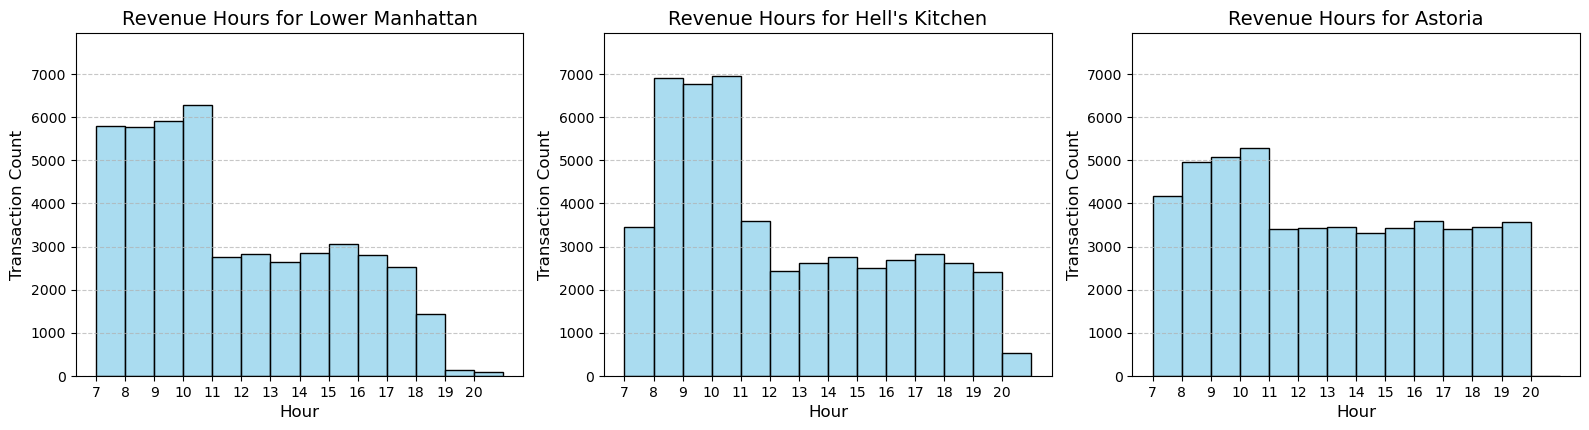

In [14]:
peak_data = data[(data["hour"] >= 7) & (data["hour"] <= 20)]

store_locations = peak_data["store_location"].unique()

max_count = max(
    peak_data.groupby(["store_location", "hour"]).size().max(),10 
)

plt.figure(figsize=(16, 12))

for i, store in enumerate(store_locations, 1):
    plt.subplot(3, 3, i)
    store_data = peak_data[peak_data["store_location"] == store]
    sns.histplot(
        store_data["hour"], 
        bins=range(7, 22),  
        kde=False, 
        color="skyblue", 
        alpha=0.7
    )
    plt.title(f"Revenue Hours for {store}", fontsize=14)
    plt.xlabel("Hour", fontsize=12)
    plt.ylabel("Transaction Count", fontsize=12)
    plt.xticks(range(7, 21))  
    plt.ylim(0, max_count+1000)  
    plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


**Nhận xét:**
- Trước tiên, đối với giờ cao điểm của từng chi nhánh cà phê, ta nhận thấy:
  
    - Cửa hàng ở **Lower Manhattan** có khoảng thời gian cao điểm kéo dài từ 7h đến 11h.
      
    - Cửa hàng ở **Hell's Kitchen** có khoảng thời gian cao điểm kéo dài từ 8h đến 11h.
    - Cửa hàng ở **Astoria** có khoảng thời gian cao điểm kéo dài từ 8h đến 11h.
- Thời gian cao điểm của **Hell's Kitchen** kéo dài không phải nhiều nhất trong 3 cửa hàng. Tuy nhiên, hiệu quả hoạt động của cửa hàng trong khu vực này vào giờ cao điểm lại cao nhất với doanh thu xấp xỉ 7000 đô la kéo dài liên tục từ 8h đến 11h. Trong khi ở **Lower Manhattan**, doanh thu chỉ đạt khoảng 6000 đô la, và ở **Astoria** chỉ đạt khoảng 5000 đô la trong thời gian cao điểm.

**Tóm lại:**
- Cửa hàng cà phê ở **Lower Manhattan** có mức duy trì doanh thu vào thời gian cao điểm tốt hơn so với 2 cửa hàng còn lại.
  
- Cửa hàng cà phê ở **Hell's Kitchen** tuy không thể hiện thế mạnh ở việc duy trì doanh thu vào cao điểm tốt so với **Lower Manhattan** nhưng hiệu quả hoạt động của cửa hàng vào thời điểm này lại là tốt nhất.
- Cửa hàng cà phê ở **Astoria** cho thấy sự hoạt động kém hiệu quả nhất khi doanh thu thu về đạt ở mức thấp nhất so với 2 cửa hàng còn lại vào giờ cao điểm.

**Lý do chọn biểu đồ:**
- Biểu đồ histogram được sử dụng vô cùng phù hợp để nhận thấy được khoảng thời gian cao điểm dựa vào sự chênh lệch trong phân bố doanh thu qua từng khoảng thời gian.
  
- Ngoài ra, việc đặt 3 biểu đồ cạnh nhau còn giúp ta dễ dàng nhận thấy sự chênh lệch rõ ràng về doanh thu vào giờ cao điểm của các cửa hàng đôi một với nhau.

#### *4.3 Doanh thu trung bình theo mỗi loại sản phẩm tại mỗi của hàng là bao nhiêu?*

Ở đây, ta sẽ đánh giá qua từng phân loại sản phẩm với tổng số 9 phân loại.

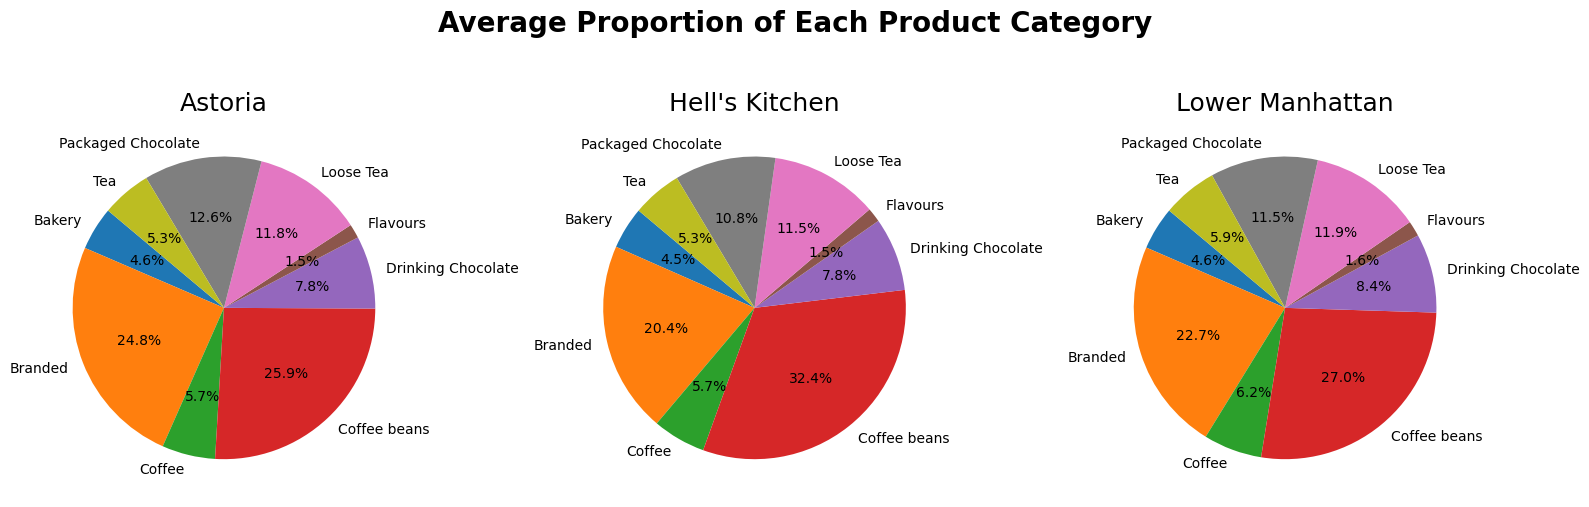

In [15]:
avg_revenue = data.groupby(["store_location", "product_category"])["total_revenue"].mean().reset_index()

store_locations = avg_revenue["store_location"].unique()

color_palette = sns.color_palette("tab10", len(avg_revenue["product_category"].unique()))

plt.figure(figsize=(16, 16))

product_categories = avg_revenue["product_category"].unique()

for i, store in enumerate(store_locations, 1):
    plt.subplot(3, 3, i)
    store_data = avg_revenue[avg_revenue["store_location"] == store]
    sizes = store_data["total_revenue"]
    labels = store_data["product_category"]
    
    plt.pie(
        sizes, 
        labels=labels,
        autopct='%1.1f%%', 
        startangle=140, 
        colors=color_palette, 
        textprops={'fontsize': 10}
    )
    plt.title(store, fontsize=18)  

plt.suptitle("Average Proportion of Each Product Category", fontsize=20, fontweight='bold')

plt.tight_layout() 
plt.show()

**Nhận xét:**
- Từ biểu đồ, ta nhận thấy ở mỗi chi nhánh cửa hàng cà phê, những loại thức uống thuộc **Coffee beans** và **Branded** chiếm tỉ lệ rất lớn trong tổng thể. Cụ thể, chiếm lần lượt 50.7%, 52.8% và 49.7% trong tổng thể các phân loại đồ uống ở các khu vực **Astoria**, **Hell's Kitchen** và **Lower Manhattan** tương ứng.

- Những sản phẩm thuộc phân loại Coffee beans có tỉ lệ doanh thu trung bình cao nhất lần lượt là 25.9%, 32.4% và 27.0% ở các khu vực **Astoria**, **Hell's Kitchen** và **Lower Manhattan** tương ứng. Đây chắc chắn là những loại thức uống được ưa chuộng và mang lại doanh thu lớn nhất trong các cửa hàng.
- Những sản phẩm thuộc loại **Branded** cũng không kém cạnh quá nhiều so với **Coffee beans** khi có tỉ lệ doanh thu trung bình lần lượt 24.8%, 20.4% và 22.7% ở các khu vực **Astoria**, **Hell's Kitchen** và **Lower Manhattan** tương ứng. Dù không phải thức uống sở hữu tỉ lệ doanh thu cao nhất ở trong các cửa hàng, nhưng sự chênh lệch tỉ lệ của **Branded** so với **Coffee beans** là không quá nhiều, chứng tỏ những thức uống thuộc loại này cũng rất được ưa chuộng của khách hàng.
- Các phân loại sản phẩm khác chiếm tỉ lệ không đáng kể so với 2 phân loại trên, trong đó **Flavours** là thức uống có tỉ lệ trung bình doanh thu thấp nhất ở các cửa hàng khi chỉ chiếm khoảng 1.5% doanh thu trung bình trong các cửa hàng.

**Tóm lại:**
- 2 phân loại thức uống mang lại doanh thu cực kì cao trong các cửa hàng là **Coffee beans** và **Branded** khi có trung bình doanh thu chiếm một nửa trên tổng thể.
  
- Các sản phẩm thuộc phân loại **Flavours** lại không được ưa chuộng nhiều của khách hàng khi chiếm chưa đến 2% tổng trung bình các phân loại  

**Lý do chọn biểu đồ:**
- Biểu đồ chọn hoàn toàn phù hợp cho việc so sánh doanh thu trung bình của từng loại sản phẩm trong từng cửa hàng thông qua cách thể hiện sự chênh lệch về tỉ lệ phần trăm.

---

### **5. Phân tích hiệu suất sản phẩm**

#### *5.1 Danh mục sản phẩm nào đóng góp lớn nhất vào tổng doanh thu theo tháng?*

In [16]:
# Tổng hợp doanh thu theo tháng và danh mục sản phẩm
monthly_category_revenue = data.groupby(['month', 'product_category'], as_index=False)['total_revenue'].sum()

# Vẽ biểu đồ
fig = px.bar(
    monthly_category_revenue,
    x='month', 
    y='total_revenue', 
    color='product_category',  
    title='Total Revenue Contribution by Product Category (Monthly)',
    labels={'month': 'Month', 'total_revenue': 'Total Revenue (USD)', 'product_category': 'Product Category'},
    height=600
)

# Tùy chỉnh giao diện biểu đồ
fig.update_layout(
    barmode='stack',  
    xaxis=dict(
        title='Month',
        tickmode='array', 
        tickvals=monthly_category_revenue['month'].unique(),  
    ),
    yaxis=dict(
        title='Total Revenue (USD)',
        showgrid=True,
    ),
    plot_bgcolor='white',  
    template='simple_white',
    width=1000, 
    height=600, 
)

fig.show()

**Nhận xét:**
- Lý do chọn biểu đồ cột chồng (stacked bar chart):
Vì biểu đồ này giúp hiển thị so sánh doanh thu của từng danh mục sản phẩm trong một tháng một cách rõ ràng và trực quan
Dễ dàng nhận biết và so sánh các danh mục nào có tổng doanh thu vượt trội hơn qua chiều cao. Danh mục có doanh thu ổn định hoặc tăng trong các tháng sẽ có chiều cao cột đều hoặc tăng dần. Nếu có danh mục bất ngờ giảm hoặc tăng doanh thu trong tháng nào đó, điều này cũng dễ nhận ra để kịp thời tìm hiểu nguyên nhân.
- Nhận xét dựa trên biểu đồ trực quan:
Nhìn vào biểu đồ ta thấy một số danh mục sản phẩm có doanh thu cao liên tục qua các tháng, thể hiện sức hút ổn định của mặt hàng này so với các mặt hăng khác các sản phẩm ta thấy trên biểu đồ như là Bakery, Tea, Coffee, điểu này giúp cửa hàng dễ dàng kiểm soát được số lượng sản phẩm cần đặt để mang lại hiệu suất kinh doanh tốt nhất. Dựa vào biểu đồ, cửa hàng có thể tập trung đẩy mạnh các danh mục sản phẩm chủ lực theo mùa.

#### *5.2 Sản phẩm nào bán chạy nhất theo tháng? Liệu sản phẩm đó có thuộc danh mục sản phẩm mang lại doanh thu lớn nhất theo tháng?*

In [17]:
# Tổng hợp số lượng bán ra theo tháng và loại sản phẩm
monthly_product_sales = data.groupby(['month', 'product_type'], as_index=False)['transaction_qty'].sum()

# Vẽ biểu đồ đường
fig = px.line(
    monthly_product_sales,
    x='month', 
    y='transaction_qty', 
    color='product_type',  
    title='Monthly Sales Quantity by Product Type',
    labels={'month': 'Month', 'transaction_qty': 'Sales Quantity', 'product_type': 'Product Type'},
    markers=True  # Thêm các dấu chấm ở các điểm dữ liệu
)

# Tùy chỉnh giao diện biểu đồ
fig.update_layout(
    xaxis=dict(
        title='Month',
        tickmode='array', 
        tickvals=monthly_product_sales['month'].unique(),  
    ),
    yaxis=dict(
        title='Sales Quantity',
        showgrid=True,
    ),
    plot_bgcolor='white',  
    template='simple_white',
    width=1000,  
    height=600,  
    bargap=0.2  # Tăng khoảng cách giữa các cột (giảm sự chồng chéo của các đường)
)

fig.show()


**Nhận xét:**

Đây là biểu đồ đường nhiều tuyến với các điểm chốt (multi-line plot chart) thể hiện số lượng bán ra của từng loại sản phẩm theo thời gian (tháng).
- Lý do chọn biểu đồ:
Biểu đồ đường nhiều tuyến cho phép theo dõi sự thay đổi của số lượng bán ra của từng sản phẩm qua các tháng một cách trực quan. 
Đường liên tục giúp dễ dàng nhận ra xu hướng tăng, giảm hoặc ổn định của từng sản phẩm.
Với từng tuyến biểu diễn một sản phẩm, biểu đồ này dễ dàng so sánh các sản phẩm với nhau, đặc biệt khi số lượng bán của sản phẩm thay đổi đáng kể theo thời gian. Phù hợp để hiển thị nhiều sản phẩm trên cùng một biểu đồ, cho phép quan sát toàn diện và phát hiện sản phẩm nổi bật nhất.
- Nhận xét dựa trên biểu đồ trực quan:
Nhìn vào biểu đồ ta thấy "Brewed Chai Tea" là loại sản phẩm bán chạy nhất trong hầu hết các tháng tiếp đến là "Gourmet Brewed Coffee" và "Barista Espresso", các loại sản phẩm này đều nằm trong các danh mục sản phẩm có doanh thu cao như là Tea Coffee. Nhưng nhiều sản phẩm có số lượng bán thấp như "Premium Beans", "Green tea",... vẫn nằm trong doanh mục sản phẩm có doanh thu cao.
Điều này cho thấy không phải lúc nào sản phẩm bán với số lượng nhiều nhất cũng thuộc danh mục sản phẩm có doanh thu cao nhất.
Điều này phụ thuộc vào giá trị đơn vị của từng sản phẩm. Các sản phẩm giá trị cao có thể tạo ra doanh thu lớn dù số lượng bán thấp.

#### *5.3 Liệu một sản phẩm được bán ra nhiều nhất thì có phải là sản phẩm đạt được doanh thu cao nhất?*

In [18]:
# Tính toán dữ liệu
top_products_qty = data.groupby('product_type')['transaction_qty'].sum().sort_values(ascending=False).head(5)
top_products_revenue = data.groupby('product_type')['total_revenue'].sum().sort_values(ascending=False).head(5)

# Tạo màu cho biểu đồ số lượng
colors_qty = ['red' if val == top_products_qty.max() else 'green' for val in top_products_qty]

# Biểu đồ số lượng
fig1 = go.Figure()

fig1.add_trace(go.Bar(
    x=top_products_qty.values,
    y=top_products_qty.index,
    orientation='h',
    marker=dict(color=colors_qty)
))

fig1.update_layout(
    title="Top 5 Best Selling Products",
    xaxis_title="Total Quantity Sold",
    yaxis_title="Product Type",
    height=400
)

# Tạo màu cho biểu đồ doanh thu
colors_revenue = ['red' if val == top_products_revenue.max() else 'darkblue' for val in top_products_revenue]

# Biểu đồ doanh thu
fig2 = go.Figure()

fig2.add_trace(go.Bar(
    x=top_products_revenue.values,
    y=top_products_revenue.index,
    orientation='h',
    marker=dict(color=colors_revenue)
))

fig2.update_layout(
    title="Top 5 Products with the Highest Revenue",
    xaxis_title="Total Revenue (USD)",
    yaxis_title="Product Type",
    height=400
)

# Hiển thị biểu đồ
fig1.show()
fig2.show()


**Nhận xét:**
- Ở biểu đồ top 5 sản phẩm được bán chạy nhất, **Brewed Chai tea** là sản phẩm được bán chạy nhất với tổng số lượng đã bán hơn 26 ngàn sản phẩm và thấp nhất là **Hot Chocolate** với tổng số lượng đã bán hơn 17 ngàn sản phẩm.
  
- Ở biểu đồ top 5 sản phẩm được bán chạy nhất, **Barista Espresso** là sản phẩm đạt tổng doanh thu cao nhất với tổng doanh thu hơn 91 ngàn đô la và thấp nhất là **Brewed Black tea** với tổng doanh thu hơn 47 ngàn đô la.
- Mặc dù số sản phẩm được bán cho khách hàng của **Brewed Chai tea** là nhiều nhất, cao hơn **Barista Espresso** khoảng 2 ngàn sản phẩm nhưng **Barista Espresso** lại sở hữu một mức doanh thu cực kì cao, cao hơn 14 ngàn đô la so với sản phẩm được bán chạy nhất là **Brewed Chai tea** và là nguôn doanh thu lớn nhất của cửa hàng cà phê.
- Một sản phẩm khác có thể kể đến là **Hot Chocolate** mặc dù là sản phẩm nằm ở top 5 trong các sản phẩm bán chạy nhưng lại có doanh thu thuộc top 3 của cửa hàng, cao hơn cả **Gourmet brewed Coffee**, mặc dù **Gourmet brewed Coffee** là sản phẩm thuộc top 2 sản phẩm bán chạy.

**Tóm lại:**
- Sản phẩm được bán ra nhiều nhất có thể vẫn sẽ thuộc top các sản phẩm có doanh thu cao của cửa hàng, nhưng chưa chắc đã là cao nhất và ngược lại. Điều này còn phụ thuộc vào yếu tố khác như giá cả sản phẩm.

**Lý do chọn biểu đồ:**
- Không biểu đồ nào thích hợp hơn biểu đồ cột trong việc so sánh các đối tượng với nhau với số lượng nhỏ như thuộc top 5, top 10. Việc dùng biểu đồ cột ngang ở đây chỉ nhằm mục đích tăng thêm sự đa dạng biểu đồ trong phân tích.